In [22]:
## importing the libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# loading the dataset

data = load_breast_cancer()

In [24]:
# dividing the dataset into independent and dependent

X, Y = data.data, data.target

In [25]:
data.data.shape

(569, 30)

In [26]:
# splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

N, D = X_train.shape

In [27]:
scaler = StandardScaler()

In [28]:
# scaling the data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# building the model

model = nn.Sequential(
    nn.Linear(D,1), 
nn.Sigmoid()
)

In [30]:
# loss and optimizer

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters())

In [31]:
# converting numpy objects to torch tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1, 1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1, 1))

In [33]:
# training the model

n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    
    optimizer.zero_grad()
    
    # train data
    
    output_train = model(X_train)
    loss_train = criterion(output_train, Y_train)
    
    loss_train.backward()
    optimizer.step()
    
    # test data
    
    output_test = model(X_test)
    loss_test = criterion(output_test, Y_test)
    
    train_losses[it] = loss_train.item()
    test_losses[it] = loss_test.item()
    
    if (it + 1) % 50 == 0:
        print(f"epoch {it+1}/{n_epochs}, Train loss {loss_train.item():.4f}, Test loss {loss_test.item():.4f}")

epoch 50/1000, Train loss 0.4161, Test loss 0.3974
epoch 100/1000, Train loss 0.3182, Test loss 0.2935
epoch 150/1000, Train loss 0.2604, Test loss 0.2352
epoch 200/1000, Train loss 0.2231, Test loss 0.1986
epoch 250/1000, Train loss 0.1970, Test loss 0.1739
epoch 300/1000, Train loss 0.1778, Test loss 0.1562
epoch 350/1000, Train loss 0.1630, Test loss 0.1432
epoch 400/1000, Train loss 0.1511, Test loss 0.1333
epoch 450/1000, Train loss 0.1415, Test loss 0.1256
epoch 500/1000, Train loss 0.1335, Test loss 0.1195
epoch 550/1000, Train loss 0.1267, Test loss 0.1145
epoch 600/1000, Train loss 0.1209, Test loss 0.1104
epoch 650/1000, Train loss 0.1159, Test loss 0.1070
epoch 700/1000, Train loss 0.1114, Test loss 0.1042
epoch 750/1000, Train loss 0.1076, Test loss 0.1017
epoch 800/1000, Train loss 0.1041, Test loss 0.0996
epoch 850/1000, Train loss 0.1010, Test loss 0.0977
epoch 900/1000, Train loss 0.0982, Test loss 0.0961
epoch 950/1000, Train loss 0.0957, Test loss 0.0947
epoch 1000/10

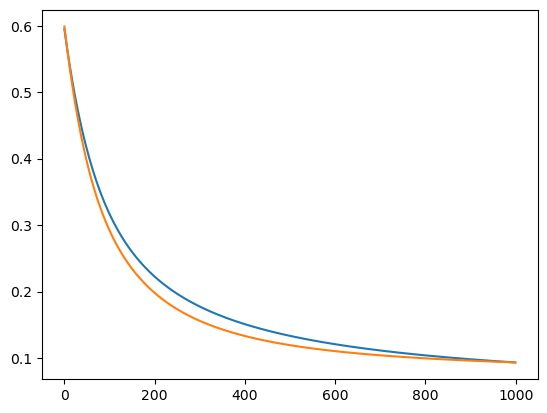

In [34]:
# plotting the train and test data

plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')

In [37]:
# calculating accuracy

with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(Y_train.numpy() == p_train)
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(Y_test.numpy() == p_test)
    
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9849, Test acc: 0.9708


In [38]:
model.state_dict() # to get the values of parameters in each layers

OrderedDict([('0.weight',
              tensor([[-0.2224, -0.4705, -0.3966, -0.4663, -0.0220, -0.2326, -0.4756, -0.3201,
                       -0.2918,  0.3783, -0.3554,  0.0843, -0.3533, -0.5204,  0.1847,  0.6362,
                        0.0303, -0.1491, -0.0452,  0.2997, -0.4267, -0.6220, -0.2886, -0.5131,
                       -0.5527, -0.3038, -0.2224, -0.2796, -0.2483, -0.4607]])),
             ('0.bias', tensor([0.4254]))])

In [39]:
torch.save(model.state_dict(), 'mymodel.pt') # saving the model

In [42]:
# to use the saved model, we have to again make the architecture and then use our saved model.

model2 = nn.Sequential(
nn.Linear(D, 1),
nn.Sigmoid()
)

In [43]:
model.load_state_dict(torch.load('mymodel.pt')) # our model is successfully loaded and ready to use

<All keys matched successfully>